## Customer churn
**Customer Churn** (also known as customer attrition) is the rate at which customers stop doing business with an entity over a given period of time. In simple terms, it is the number or percentage of existing customers who cease being customers. Churn is typically measured by the **Churn Rate**, which is calculated as:

$$\text{Churn Rate} = \frac{\text{Number of Customers Lost During the Period}}{\text{Total Number of Customers at the Start of the Period}} \times 100\%$$

Churn can be categorized as:
* Voluntary Churn: The customer actively decides to leave (e.g., switches to a competitor, is dissatisfied with the product, or finds the price too high).
* Involuntary Churn: The customer leaves unintentionally (e.g., due to an expired credit card, a failed payment, or technical issues).

A high churn rate is a direct indicator of customer dissatisfaction and business instability, posing a serious threat to a company's revenue and long-term growth.

**importance of predicting customer churn rate**

* Economic Imperative: Retention is Cheaper than Acquisition, Maximizing CLV (customer lifetime value)
* Enabling Proactive Intervention: Shifting from Reactive to Predictive, Targeted Retention Efforts

---

*Business context research*:

1. Industry churn benchmarks (telecom: 15-25%)
2. Customer acquisition cost (CAC): ~$315
3. Average customer lifetime value (LTV): ~$1,200
4. Retention cost: typically 20% of CAC (~$63)

## EDA & data cleaning

1. Loading libraries and data

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
#show first five rows to understand data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.shape

(7043, 21)

*what data shows*
* customers left with last month - Churn
* services customers can sign up for - phone services, multiple lines, internet services, online security, nline backup, device protection, tech support, streaming tv, streaming movies
* customer info
* dataset size: 7043 rows, 21 columns

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.dtypes
#predicting label is 'Churn'

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

2. missing data

In [12]:
# visualizing missing values
missing=df.isnull().sum()
missing

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---

It seems that no data is missing, but if we take a further look, 'TatolCharges' is an object, which means there are both numerical and non-numerical data in this column. If we want to further use this column to do some calculation (sum, average, ec.), we need to tranform it to numerical first

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_after_conversion = df.isnull().sum()
missing_after_conversion

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
# check if tenure=0 is exactly the same rows as TotalCharges is NaN
df[df['tenure']==0].index.equals(df[np.isnan(df['TotalCharges'])].index)

True

From these missng 'TotalCharges' data, we can notice that the 'tenure' values are all 0. This indicates that these customers did not stay with the company, even though the 'MonthlyCharges' is not empty.

This is a common situation when analyzing customer churn - **new customers** who have just started their service/contract. The 'MonthlyCharges' not empty means that they have signed the contract and agreeed on the monthly fees. The 'TotalCharges' NaN means that the total expenses have not been incurred or recorded.

---

There are two common ways to deal with this kind of missing data:
* fill with estimated values
* delete rows: only when those rows take up very little portion of the whole data - < 0.2%, or the model does not require high accuracy, or is not sensitive to new customer analysis.

In this situation, the percentage of those rows = 11/7043 = 0.16%. 



In [17]:
# we don't want to drop these rows yet, because these customers might churn in the future. So we will fill these NaN with 0 for now.
df['TotalCharges'].fillna(0, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

3. churn vs gender distribution

In [18]:
gender_pie_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    column_widths=[0.4, 0.6], 
    subplot_titles=('Gender Distribution', 'Churn Rate by Gender')
)

gender_values = df['gender'].value_counts()
ordered_gender_colors = [gender_pie_colors[label] for label in gender_values.index]

fig.add_trace(
    go.Pie(
        labels=gender_values.index, 
        values=gender_values.values, 
        name="Gender",
        marker=dict(colors=ordered_gender_colors),
        textinfo='label+percent',
        textfont_size=16
    ),
    row=1, col=1
)

sunburst_trace = px.sunburst(
    df, 
    path=['Churn', 'gender'],
    color='gender', 
    color_discrete_map=gender_pie_colors 
).data[0] 

fig.add_trace(sunburst_trace, row=1, col=2)

fig.update_traces(
    hovertemplate=(
        '<b>%{label}</b><br>' + 
        'percent: <b>%{percentRoot:.2%}</b><br>' +
        '<extra></extra>' 
    ),
    textinfo='label+percent parent', 
    textfont_size=12,
    insidetextorientation='radial',
    selector=dict(type='sunburst') 
)

fig.update_traces(
    textinfo='label+percent', 
    textfont_size=16, 
    hoverinfo="label+percent+name",
    selector=dict(type='pie')
)

fig.update_layout(
    title_text="Gender Distribution vs Churn Rate",
    coloraxis_showscale=False # no color scale displayed
)

fig.show()

* Genders are evenly distributed in general
* 73.5% customers leave the company, 26.5% stay

Both genders behaved similarly in terms of choosing to leave or stay

4. churn vs contract distribution

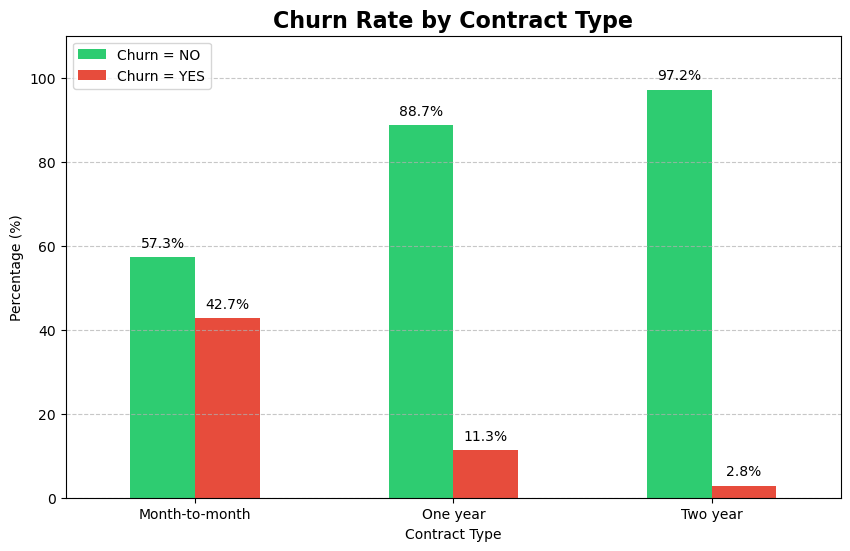

In [19]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 6))
ax = contract_churn.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'], ax=plt.gca())

#add percentage labels on top of each bar
def add_percentage_labels(ax):
    for p in ax.patches:
        percentage = f'{p.get_height():.1f}%'  # format to one decimal place
        
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()

        ax.annotate(
            percentage, 
            (x, y), 
            ha='center',      
            va='bottom',      
            xytext=(0, 5),    
            textcoords='offset points', 
            fontsize=10
        )

add_percentage_labels(ax)

plt.title('Churn Rate by Contract Type', fontsize=16, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Churn = NO', 'Churn = YES'])
plt.ylim(0, 110) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

5. churn vs tenure distribution

In [20]:

fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

* New customers are more likely to churn

6. churn vs paymentmethod

In [21]:
# payment method distribution
counts_df = df['PaymentMethod'].value_counts().reset_index()
counts_df.columns = ['PaymentMethod', 'Count']

fig = px.pie(
    counts_df, 
    values='Count', 
    names='PaymentMethod', 
    title="Payment Method Distribution"
)

fig.update_traces(
    textfont_color='white', 
    textfont_size=16,
    insidetextorientation='horizontal' # 或 'horizontal'，具体看哪个效果好
)

fig.show()

In [22]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>payment method VS churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* For customers who churn, using electronic check takes up the most percentage
* For customers who stayed, payment methods distributed almost equally

7. churn vs internet service

In [23]:
# internet service distribution
counts_df = df['InternetService'].value_counts().reset_index()
counts_df.columns = ['InternetService', 'Count']

fig = px.pie(
    counts_df, 
    values='Count', 
    names='InternetService',
    title="Internet Service Distribution"
)

fig.update_traces(
    textfont_color='white', 
    textfont_size=16,
    insidetextorientation='horizontal' # 或 'horizontal'，具体看哪个效果好
)

fig.show()

In [24]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b>Internet Service VS Churn</b>")

fig.update_layout(
    width=700, 
    height=500, 
    bargap=0.1,
    barmode='stack' 
)

fig.show()

* More customers chose fiber optic for its service, but also more of them chose to churn - it could be the service of fiber optic is not satisfactory.

8. churn vs dependent

In [25]:
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [26]:
# since the distribution of dependents is not balanced, even though customers with dependents churn less, we should know the churn rate in each group
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Churn Distribution without Dependent", "Churn Distribution with Dependent")
)

fig.add_trace(
    go.Pie(
        labels=df[df['Dependents'] == 'No']['Churn'].value_counts().index, 
        values=df[df['Dependents'] == 'No']['Churn'].value_counts().values, 
        name="Without Dependent",
        textinfo='percent+label',
    ), 
    row=1, col=1 
)

fig.add_trace(
    go.Pie(
        labels=df[df['Dependents'] == 'Yes']['Churn'].value_counts().index, 
        values=df[df['Dependents'] == 'Yes']['Churn'].value_counts().values, 
        name="With Dependent",
        textinfo='percent+label',
    ), 
    row=1, col=2 
)

fig.update_layout(
    title_text="<b>Dependent VS Churn</b>",
    width=900, 
    height=450,
    
)

fig.update_traces(
    hoverinfo="label+value+percent", 
    textfont_size=14,
    insidetextorientation='radial',
    textfont_color='white'
)

fig.show()

* combine two visualizations, customers without distributions are more likely to churn

9. churn vs senior citizen

In [27]:
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", title="<b>Senior Citizen Distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [28]:
# since the distribution of dependents is not balanced, even though customers with dependents churn less, we should know the churn rate in each group
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Senior Citizen Churn Distribution", "Non Senior Citizen Distribution")
)

fig.add_trace(
    go.Pie(
        labels=df[df['SeniorCitizen'] == 1]['Churn'].value_counts().index, 
        values=df[df['SeniorCitizen'] == 1]['Churn'].value_counts().values, 
        name="Senior Citizen",
        textinfo='percent+label',
    ), 
    row=1, col=1 
)

fig.add_trace(
    go.Pie(
        labels=df[df['SeniorCitizen'] == 0]['Churn'].value_counts().index, 
        values=df[df['SeniorCitizen'] == 0]['Churn'].value_counts().values, 
        name="Non Senior Citizen",
        textinfo='percent+label',
    ), 
    row=1, col=2 
)

fig.update_layout(
    title_text="<b>Senior Citizen VS Churn</b>",
    width=900, 
    height=450,
    
)

fig.update_traces(
    hoverinfo="label+value+percent", 
    textfont_size=14,
    insidetextorientation='radial',
    textfont_color='white'
)

fig.show()

* The **number** of non senior citizens who churn are higher than the **number** of senior. However, in terms of churn rate, senior citizens have higher one, thus are more likely to churn

10. churn vs online security

In [29]:
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Online Security distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* customers without online security are more likely to churn - understandable
* churn rates of customers with online security and customers without internet service are more difficult to tell


In [30]:
# since the distribution of dependents is not balanced, even though customers with dependents churn less, we should know the churn rate in each group
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("With Online Security", "Without Internet Service")
)

fig.add_trace(
    go.Pie(
        labels=df[df['OnlineSecurity'] == 'Yes']['Churn'].value_counts().index, 
        values=df[df['OnlineSecurity'] == 'Yes']['Churn'].value_counts().values, 
        name="With Online Security",
        textinfo='percent+label',
    ), 
    row=1, col=1 
)

fig.add_trace(
    go.Pie(
        labels=df[df['OnlineSecurity'] == 'No internet service']['Churn'].value_counts().index, 
        values=df[df['OnlineSecurity'] == 'No internet service']['Churn'].value_counts().values, 
        name="Without Internet Service",
        textinfo='percent+label',
    ), 
    row=1, col=2 
)

fig.update_layout(
    title_text="<b>Online Security VS Churn</b>",
    width=900, 
    height=450,
    
)

fig.update_traces(
    hoverinfo="label+value+percent", 
    textfont_size=14,
    insidetextorientation='radial',
    textfont_color='white'
)

fig.show()

* Interestingly, customers without internet service are less likely to churn, maybe because their needs are simple

11. churn vs paperless billing

In [31]:
fig = px.histogram(df, x="Churn", color="PaperlessBilling", title="<b>Paperless Billing VS Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* customers with paperless billing are more likely to churn, maybe because the process is easier as they don't need to wait for the bill

12. churn vs tech support

In [32]:
fig = px.histogram(df, x="Churn", color="TechSupport", title="<b>Tech Support VS Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* customers without tech support are more likely to churn

13. churn vs phone service

In [33]:
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Phone Service VS Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [34]:
# It's hard to tell the churn rate, as most of customers have phone service, and of course a lot more of them churn
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("With Phone Service", "Without Phone Service")
)

fig.add_trace(
    go.Pie(
        labels=df[df['PhoneService'] == 'Yes']['Churn'].value_counts().index, 
        values=df[df['PhoneService'] == 'Yes']['Churn'].value_counts().values, 
        name="With Phone Service",
        textinfo='percent+label',
    ), 
    row=1, col=1 
)

fig.add_trace(
    go.Pie(
        labels=df[df['PhoneService'] == 'No']['Churn'].value_counts().index, 
        values=df[df['PhoneService'] == 'No']['Churn'].value_counts().values, 
        name="Without Phone Service",
        textinfo='percent+label',
    ), 
    row=1, col=2 
)

fig.update_layout(
    title_text="<b>Phone Service VS Churn</b>",
    width=900, 
    height=450,
    
)

fig.update_traces(
    hoverinfo="label+value+percent", 
    textfont_size=14,
    insidetextorientation='radial',
    textfont_color='white'
)

fig.show()

* Surprisingly, the churn rates between customers with and without phone services are very much close - phone service could be a irrelevant factor when considering churn rate.

14. churn vs charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

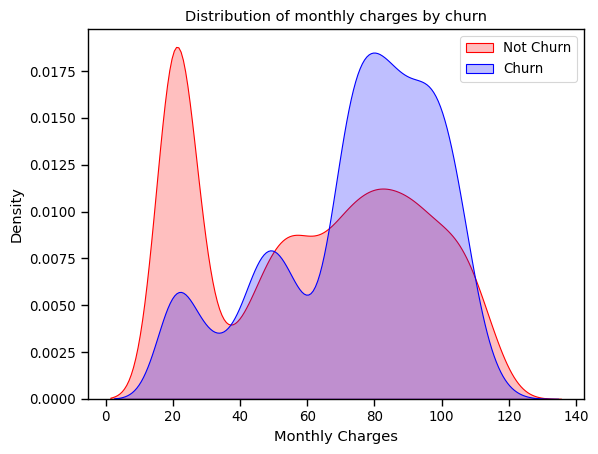

In [35]:
# monthly charges vs churn
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

* as monthly charges go up, customers are more likely to churn

Text(0.5, 1.0, 'Distribution of total charges by churn')

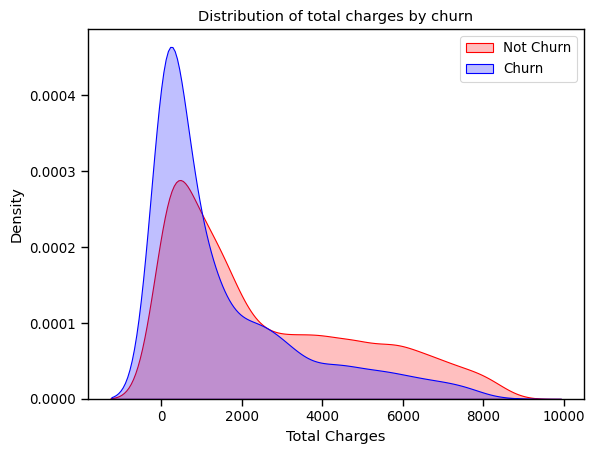

In [36]:
# total charges vs churn
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

* the total charges are mostly around 0 - 2000, and customers are more likely to churn.
* as the total charges go up, the number of customers in general go down, but customers are more likely to choose to stay.

# correlation heatmap

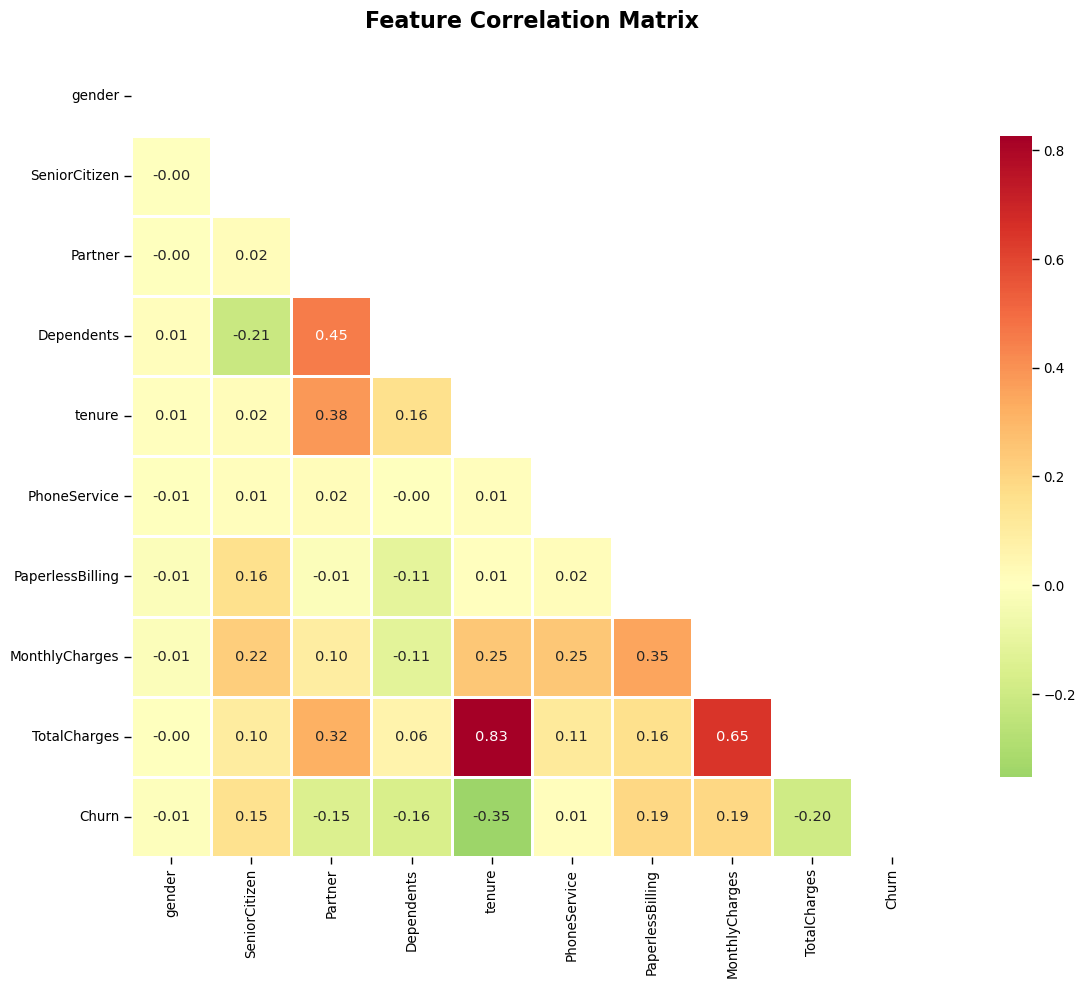


HIGH CORRELATIONS (|r| > 0.7)
Feature_1    Feature_2 Correlation
   tenure TotalCharges       0.826

⚠️  Consider removing one feature from each highly correlated pair

TOP 3 FEATURES CORRELATED WITH CHURN
  tenure                    : 0.352  ↓ Decreases churn risk
  TotalCharges              : 0.198  ↓ Decreases churn risk
  MonthlyCharges            : 0.193  ↑ Increases churn risk


In [37]:
# Prepare data for correlation
df_numeric = df.copy()

# Encode binary variables
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in df_numeric.select_dtypes(include=['object']).columns:
    if df_numeric[col].nunique() == 2:
        df_numeric[col] = df_numeric[col].map(binary_map)

# Encode target
df_numeric['Churn'] = (df_numeric['Churn'] == 1).astype(int)

# Select numerical columns
numeric_cols_all = df_numeric.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = df_numeric[numeric_cols_all].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
           cmap='RdYlGn_r', center=0, square=True, linewidths=1,
           cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
print("\n" + "="*60)
print("HIGH CORRELATIONS (|r| > 0.7)")
print("="*60)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': f'{corr_matrix.iloc[i, j]:.3f}'
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
    print("\n⚠️  Consider removing one feature from each highly correlated pair")
else:
    print("No highly correlated feature pairs found")

# Features most correlated with Churn
print("\n" + "="*60)
print("TOP 3 FEATURES CORRELATED WITH CHURN")
print("="*60)
churn_corr = corr_matrix['Churn'].abs().sort_values(ascending=False)[1:4]
for feature, corr in churn_corr.items():
    direction = "↑ Increases" if corr_matrix.loc[feature, 'Churn'] > 0 else "↓ Decreases"
    print(f"  {feature:25s} : {corr:.3f}  {direction} churn risk")

* consider dropping total charge - less correlation to churn

# Feature engineering

1.  RFM (Recency, Frequency, Monetary) Feature Engineering

In [38]:
# 1. RECENCY: How recently customer joined (tenure-based)
# In this dataset, lower tenure = more recent = higher risk
df['recency_score'] = pd.cut(df['tenure'], 
                              bins=[0, 6, 12, 24, 72], 
                              labels=[4, 3, 2, 1],
                              include_lowest=True)  # 4=very recent (high risk)

df['recency_score'] = df['recency_score'].astype(int)

print("\nRECENCY SCORES (Tenure-based):")
print(df.groupby('recency_score')['Churn'].apply(lambda x: (x=='Yes').mean()*100))

# 2. FREQUENCY: Service usage intensity
# Count number of services subscribed
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create binary service indicators
df['service_count'] = 0
for col in service_cols:
    if col == 'InternetService':
        df['service_count'] += (df[col] != 'No').astype(int)
    else:
        df['service_count'] += (df[col] == 'Yes').astype(int)

df['frequency_score'] = pd.cut(df['service_count'],
                               bins=[-1, 2, 4, 6, 10],
                               labels=[1, 2, 3, 4])  # 4=high engagement
df['frequency_score'] = df['frequency_score'].astype(int)

print("\nFREQUENCY SCORES (Service count):")
print(df.groupby('frequency_score')['Churn'].apply(lambda x: (x=='Yes').mean()*100))

# 3. MONETARY: Revenue contribution
df['monetary_score'] = pd.cut(df['TotalCharges'],
                              bins=[0, 500, 2000, 4000, 10000],
                              labels=[1, 2, 3, 4],
                              include_lowest=True)  # 4=high value
df['monetary_score'] = df['monetary_score'].astype(int)

print("\nMONETARY SCORES (Total charges):")
print(df.groupby('monetary_score')['Churn'].apply(lambda x: (x=='Yes').mean()*100))

# 4. COMPOSITE RFM SCORE
df['rfm_score'] = (df['recency_score'] + 
                   df['frequency_score'] + 
                   df['monetary_score'])

# Create customer segments
df['customer_segment'] = pd.cut(df['rfm_score'],
                               bins=[0, 5, 8, 12],
                               labels=['At-Risk', 'Medium-Value', 'High-Value'])

print("\nCUSTOMER SEGMENTS (RFM-based):")
segment_analysis = df.groupby('customer_segment').agg({
    'Churn': lambda x: f"{(x=='Yes').mean()*100:.1f}%",
    'customerID': 'count',
    'MonthlyCharges': 'mean'
})
segment_analysis.columns = ['Churn_Rate', 'Customer_Count', 'Avg_Monthly_Revenue']
print(segment_analysis)


RECENCY SCORES (Tenure-based):
recency_score
1    14.036003
2    28.710938
3    35.886525
4    52.937205
Name: Churn, dtype: float64

FREQUENCY SCORES (Service count):
frequency_score
1    19.029675
2    40.419658
3    28.469945
4    16.575450
Name: Churn, dtype: float64

MONETARY SCORES (Total charges):
monetary_score
1    41.223272
2    23.437500
3    23.758278
4    14.745146
Name: Churn, dtype: float64

CUSTOMER SEGMENTS (RFM-based):
                 Churn_Rate  Customer_Count  Avg_Monthly_Revenue
customer_segment                                                
At-Risk                6.8%            1552            27.349968
Medium-Value          36.0%            4400            69.565091
High-Value            16.4%            1091            98.609578


2. Behavioral Risk Features

In [39]:
print("\n" + "="*60)
print("BEHAVIORAL RISK FEATURES")
print("="*60)

# 1. CONTRACT RISK SCORE
contract_risk_map = {
    'Month-to-month': 3,  # High risk
    'One year': 2,        # Medium risk
    'Two year': 1         # Low risk
}
df['contract_risk_score'] = df['Contract'].map(contract_risk_map)

# 2. PAYMENT RISK SCORE (based on observed churn rates)
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(
    lambda x: (x=='Yes').mean()
).to_dict()
df['payment_risk_score'] = df['PaymentMethod'].map(payment_churn)

# 3. SENIOR CITIZEN FLAG (already 0/1)
# Keep as is

# 4. PAPERLESS BILLING RISK
# Customers with paperless billing + auto-pay might be less engaged
df['paperless_billing_risk'] = (
    (df['PaperlessBilling'] == 'Yes') & 
    (df['PaymentMethod'] != 'Bank transfer (automatic)') &
    (df['PaymentMethod'] != 'Credit card (automatic)')
).astype(int)

# 5. NO PROTECTION SERVICES FLAG
df['no_protection'] = (
    ((df['OnlineSecurity'] == 'No') | (df['OnlineSecurity'] == 'No internet service')) &
    ((df['OnlineBackup'] == 'No') | (df['OnlineBackup'] == 'No internet service')) &
    ((df['DeviceProtection'] == 'No') | (df['DeviceProtection'] == 'No internet service')) &
    ((df['TechSupport'] == 'No') | (df['TechSupport'] == 'No internet service'))
).astype(int)

# 6. FIBER OPTIC WITHOUT SUPPORT
df['fiber_no_support'] = (
    (df['InternetService'] == 'Fiber optic') &
    ((df['TechSupport'] == 'No') | (df['OnlineSecurity'] == 'No'))
).astype(int)

# Print churn rates for new features
risk_features = ['contract_risk_score', 'payment_risk_score', 
                'paperless_billing_risk', 'no_protection', 'fiber_no_support']

for feature in risk_features:
    print(f"\n{feature.upper()}:")
    if df[feature].dtype in ['int64', 'float64']:
        churn_by_feature = df.groupby(feature)['Churn'].apply(
            lambda x: (x=='Yes').mean()*100
        )
        for val, rate in churn_by_feature.items():
            print(f"  Value {val}: {rate:.1f}% churn rate")


BEHAVIORAL RISK FEATURES

CONTRACT_RISK_SCORE:
  Value 1: 2.8% churn rate
  Value 2: 11.3% churn rate
  Value 3: 42.7% churn rate

PAYMENT_RISK_SCORE:
  Value 0.15243101182654403: 15.2% churn rate
  Value 0.16709844559585493: 16.7% churn rate
  Value 0.19106699751861042: 19.1% churn rate
  Value 0.4528541226215645: 45.3% churn rate

PAPERLESS_BILLING_RISK:
  Value 0: 17.7% churn rate
  Value 1: 43.6% churn rate

NO_PROTECTION:
  Value 0: 24.4% churn rate
  Value 1: 29.8% churn rate

FIBER_NO_SUPPORT:
  Value 0: 14.5% churn rate
  Value 1: 45.7% churn rate


3. ENGAGEMENT & VALUE FEATURES


In [40]:
#=============================================================================
# ENGAGEMENT & VALUE FEATURES
#=============================================================================

print("\n" + "="*60)
print("ENGAGEMENT & VALUE FEATURES")
print("="*60)

# 1. SUPPORT SERVICES ENGAGEMENT
support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['support_services_count'] = 0
for service in support_services:
    df['support_services_count'] += (df[service] == 'Yes').astype(int)

df['has_any_support'] = (df['support_services_count'] > 0).astype(int)

# 2. STREAMING ENGAGEMENT
streaming_services = ['StreamingTV', 'StreamingMovies']
df['streaming_count'] = 0
for service in streaming_services:
    df['streaming_count'] += (df[service] == 'Yes').astype(int)

df['is_streamer'] = (df['streaming_count'] > 0).astype(int)

# 3. OVERALL ENGAGEMENT SCORE
df['engagement_score'] = (
    df['support_services_count'] + 
    df['streaming_count'] +
    (df['PhoneService'] == 'Yes').astype(int) +
    (df['MultipleLines'] == 'Yes').astype(int)
)

# 4. SERVICE DIVERSITY RATIO
total_possible_services = 9
df['service_diversity_ratio'] = df['service_count'] / total_possible_services

# 5. PHONE + INTERNET BUNDLE
df['has_bundle'] = (
    (df['PhoneService'] == 'Yes') & 
    (df['InternetService'] != 'No')
).astype(int)

# 6. FAMILY INDICATOR (Partner OR Dependents)
df['has_family'] = (
    (df['Partner'] == 'Yes') | 
    (df['Dependents'] == 'Yes')
).astype(int)

print("\nENGAGEMENT FEATURES - Churn Rates:")
print(f"\nSupport Services Count:")
print(df.groupby('support_services_count')['Churn'].apply(lambda x: (x=='Yes').mean()*100).round(1))

print(f"\nEngagement Score:")
print(df.groupby('engagement_score')['Churn'].apply(lambda x: (x=='Yes').mean()*100).round(1))

print(f"\nHas Bundle:")
print(df.groupby('has_bundle')['Churn'].apply(lambda x: (x=='Yes').mean()*100).round(1))



ENGAGEMENT & VALUE FEATURES

ENGAGEMENT FEATURES - Churn Rates:

Support Services Count:
support_services_count
0    29.8
1    38.9
2    23.8
3    12.4
4     5.3
Name: Churn, dtype: float64

Engagement Score:
engagement_score
0    43.8
1    21.1
2    32.8
3    36.5
4    31.3
5    25.6
6    22.5
7    12.4
8     5.3
Name: Churn, dtype: float64

Has Bundle:
has_bundle
0    12.8
1    32.8
Name: Churn, dtype: float64


4. RATIO & EFFICIENCY FEATURES

In [41]:
print("\n" + "="*60)
print("RATIO & EFFICIENCY FEATURES")
print("="*60)

# 1. PRICE PER SERVICE (Value perception)
df['price_per_service'] = df['MonthlyCharges'] / (df['service_count'] + 1)

# 2. AVERAGE MONTHLY SPEND RATE
df['avg_monthly_spend'] = df['TotalCharges'] / (df['tenure'] + 1)

# 3. CHARGES VS MEDIAN (Relative pricing)
median_monthly = df['MonthlyCharges'].median()
df['charges_vs_median'] = df['MonthlyCharges'] / median_monthly

# 4. SPENDING TIER
df['spending_tier'] = pd.cut(df['MonthlyCharges'],
                             bins=[0, 35, 70, 150],
                             labels=['Low', 'Medium', 'High'])

# 5. TENURE TO CHARGES RATIO (Loyalty value)
df['tenure_to_charges_ratio'] = df['tenure'] / (df['MonthlyCharges'] + 1)

# 6. VALUE PERCEPTION SCORE
df['value_score'] = df['service_count'] / (df['charges_vs_median'] + 0.1)

print("\nRATIO FEATURES - Statistics:")
ratio_features = ['price_per_service', 'avg_monthly_spend', 'charges_vs_median', 'value_score']
for feat in ratio_features:
    churned_mean = df[df['Churn']=='Yes'][feat].mean()
    retained_mean = df[df['Churn']=='No'][feat].mean()
    print(f"\n{feat}:")
    print(f"  Churned: {churned_mean:.2f}")
    print(f"  Retained: {retained_mean:.2f}")
    print(f"  Difference: {abs(churned_mean - retained_mean):.2f}")


RATIO & EFFICIENCY FEATURES

RATIO FEATURES - Statistics:

price_per_service:
  Churned: 15.03
  Retained: 11.78
  Difference: 3.25

avg_monthly_spend:
  Churned: 62.68
  Retained: 57.66
  Difference: 5.03

charges_vs_median:
  Churned: 1.06
  Retained: 0.87
  Difference: 0.19

value_score:
  Churned: 3.44
  Retained: 4.06
  Difference: 0.61



FEATURE ENGINEERING SUMMARY

Total Features Created: 25

Engineered Features List:
  1. recency_score
  2. service_count
  3. frequency_score
  4. monetary_score
  5. rfm_score
  6. customer_segment
  7. contract_risk_score
  8. payment_risk_score
  9. paperless_billing_risk
  10. no_protection
  11. fiber_no_support
  12. support_services_count
  13. has_any_support
  14. streaming_count
  15. is_streamer
  16. engagement_score
  17. service_diversity_ratio
  18. has_bundle
  19. has_family
  20. price_per_service
  21. avg_monthly_spend
  22. charges_vs_median
  23. spending_tier
  24. tenure_to_charges_ratio
  25. value_score


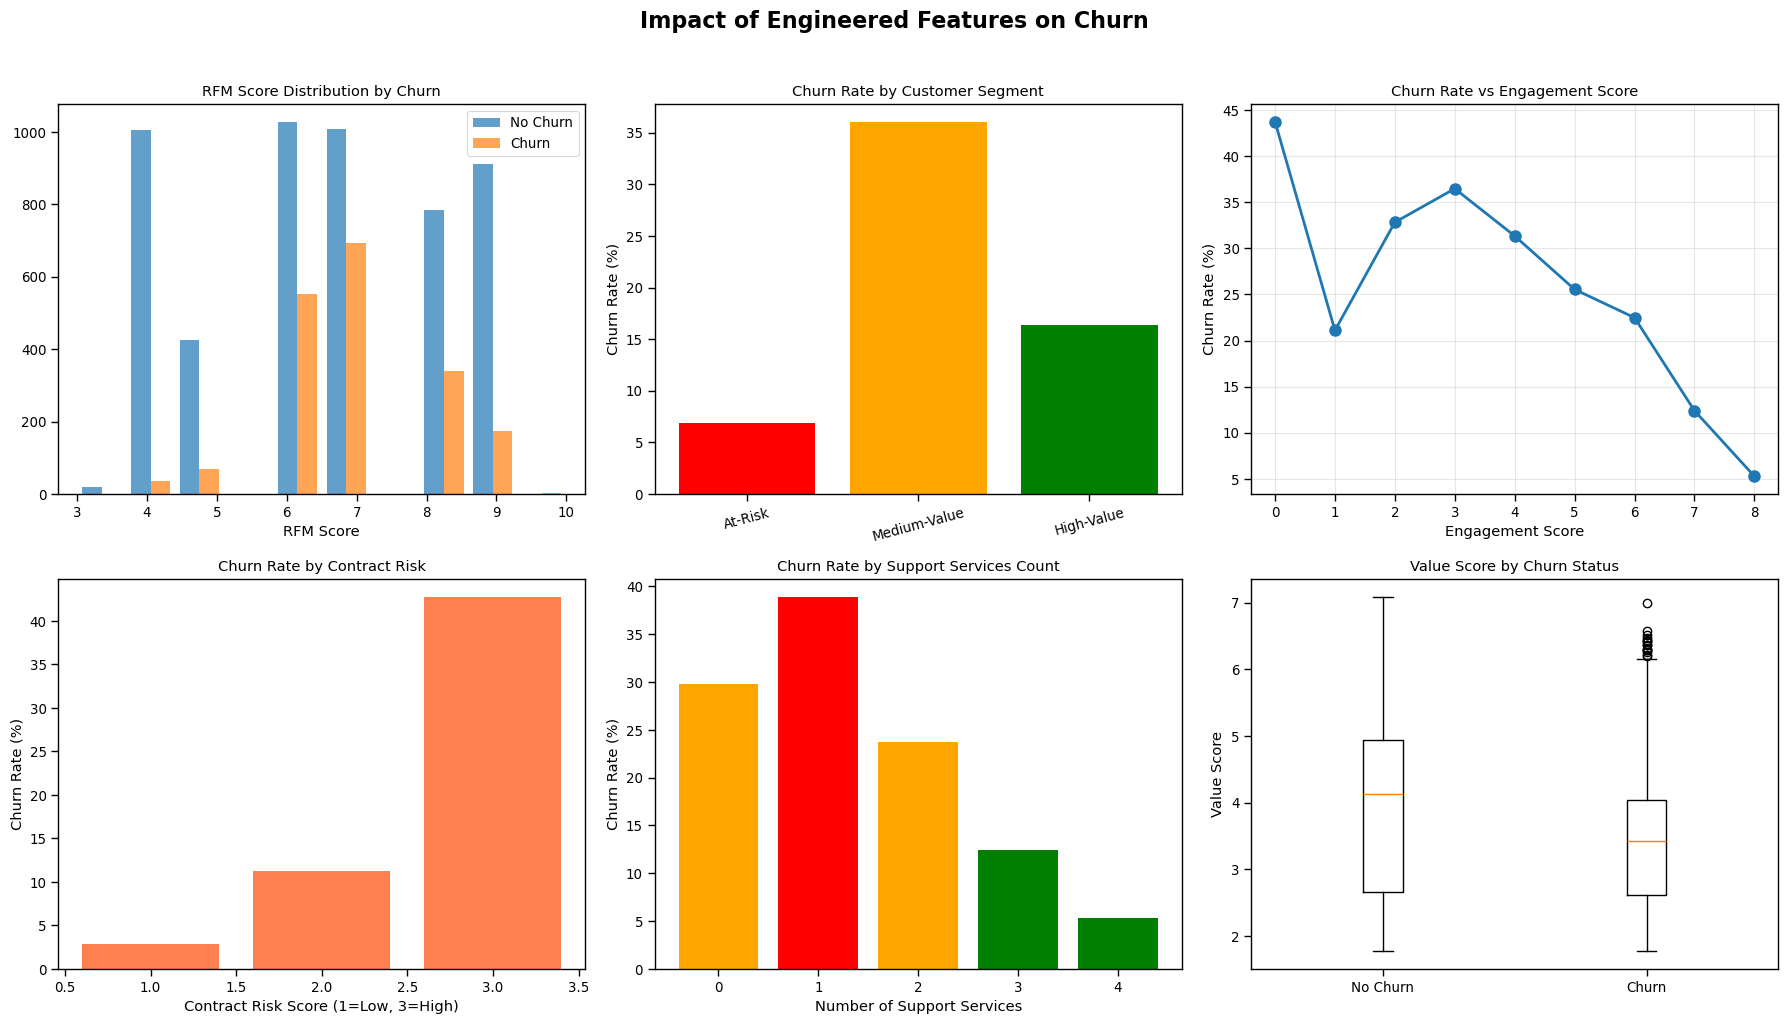


✅ Feature engineering complete!


In [42]:

print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)

# Get all engineered features
original_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

engineered_features = [col for col in df.columns if col not in original_cols]

print(f"\nTotal Features Created: {len(engineered_features)}")
print(f"\nEngineered Features List:")
for i, feat in enumerate(engineered_features, 1):
    print(f"  {i}. {feat}")

# Visualize top engineered features impact
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. RFM Score
axes[0, 0].hist([df[df['Churn']=='No']['rfm_score'],
                 df[df['Churn']=='Yes']['rfm_score']],
                label=['No Churn', 'Churn'], bins=10, alpha=0.7)
axes[0, 0].set_title('RFM Score Distribution by Churn')
axes[0, 0].set_xlabel('RFM Score')
axes[0, 0].legend()

# 2. Customer Segment
segment_churn = df.groupby('customer_segment')['Churn'].apply(
    lambda x: (x=='Yes').mean()*100
)
axes[0, 1].bar(range(len(segment_churn)), segment_churn.values, 
               color=['red', 'orange', 'green'])
axes[0, 1].set_title('Churn Rate by Customer Segment')
axes[0, 1].set_xticks(range(len(segment_churn)))
axes[0, 1].set_xticklabels(segment_churn.index, rotation=15)
axes[0, 1].set_ylabel('Churn Rate (%)')

# 3. Engagement Score
engagement_churn = df.groupby('engagement_score')['Churn'].apply(
    lambda x: (x=='Yes').mean()*100
)
axes[0, 2].plot(engagement_churn.index, engagement_churn.values, 
                marker='o', linewidth=2, markersize=8)
axes[0, 2].set_title('Churn Rate vs Engagement Score')
axes[0, 2].set_xlabel('Engagement Score')
axes[0, 2].set_ylabel('Churn Rate (%)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Contract Risk Score
risk_churn = df.groupby('contract_risk_score')['Churn'].apply(
    lambda x: (x=='Yes').mean()*100
)
axes[1, 0].bar(risk_churn.index, risk_churn.values, color='coral')
axes[1, 0].set_title('Churn Rate by Contract Risk')
axes[1, 0].set_xlabel('Contract Risk Score (1=Low, 3=High)')
axes[1, 0].set_ylabel('Churn Rate (%)')

# 5. Support Services Impact
support_churn = df.groupby('support_services_count')['Churn'].apply(
    lambda x: (x=='Yes').mean()*100
)
axes[1, 1].bar(support_churn.index, support_churn.values, 
               color=['red' if x > 30 else 'orange' if x > 20 else 'green' 
                      for x in support_churn.values])
axes[1, 1].set_title('Churn Rate by Support Services Count')
axes[1, 1].set_xlabel('Number of Support Services')
axes[1, 1].set_ylabel('Churn Rate (%)')

# 6. Value Score Distribution
axes[1, 2].boxplot([df[df['Churn']=='No']['value_score'],
                     df[df['Churn']=='Yes']['value_score']],
                    labels=['No Churn', 'Churn'])
axes[1, 2].set_title('Value Score by Churn Status')
axes[1, 2].set_ylabel('Value Score')

plt.suptitle('Impact of Engineered Features on Churn', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✅ Feature engineering complete!")

1. RFM analysis
* Recency: The first year is make-or-break." Customers are 3.8x more likely to churn in their first 6 months compared to veterans (2+ years). This suggests poor onboarding or unmet initial expectations.
* Frequency: Too few services = disengagement. Too many mid-tier services = complexity fatigue." The surprising spike at medium engagement suggests customers feel overwhelmed without seeing clear value.
* Monetary: The middle is bleeding. Medium-value customers (62% of base) have 5.3x higher churn than at-risk and 2.2x higher than high-value. These are customers paying more but not seeing proportional value.
2. Crytical risk factors
* contract type: Month-to-month customers are 15x more likely to churn than two-year contracts. This is the single strongest predictor.
* payment method: Electronic check customers are 3x more likely to churn. Manual payment = friction = monthly reconsideration of value.
* Fiber optic: a double-edged sword. High-speed customers have high expectations. Without tech support, they experience issues alone and leave frustrated.
3. Engagement analysis
* Each support service reduces churn by ~6%. But there's a counterintuitive spike at 1 service - customers with ONLY one support service churn more than those with zero.
4. Value percenption score analysis
* Churned customers feel they're paying 18% more for what they get." This is a pricing-to-value alignment issue, not necessarily a pricing problem.


# modeling

1.  **Defining Features (X) and Target (y)**: We'll select our final, high-value engineered features and drop the original/intermediate ones to avoid redundancy and multicollinearity.
2.  **Train-Test Split**: We'll split the data to train the model and test it on unseen data.
3.  **Creating a Preprocessing Pipeline**: This is a data science best practice. We'll use `scikit-learn`'s `ColumnTransformer` and `Pipeline` to:
    * **One-Hot Encode** categorical features (like `customer_segment`).
    * **Scale** numerical features (using `StandardScaler`).
4.  **Handling Imbalance with SMOTE**: We will integrate `SMOTE` directly into our pipeline using `imbalanced-learn` to ensure we only oversample the *training* data, preventing data leakage.

In [43]:
# Modeling & Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, classification_report, 
                             confusion_matrix, precision_recall_curve, roc_curve, auc)

# Imbalance Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Model & Interpretability
import xgboost as xgb
import shap

# --- 1. Define Target (y) ---
df_model = df.copy()
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})
target = 'Churn'

# --- 2. Define Features (X) ---

# Drop original/intermediate columns to use our final engineered features
cols_to_drop = [
    'customerID', 'Churn', 
    'tenure', 'TotalCharges', 'Contract', 'PaymentMethod', # Replaced by risk scores/recency
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', # Used in 'support_services_count' & 'no_protection'
    'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines', # Used in 'engagement_score' & 'is_streamer'
    'Partner', 'Dependents', 'PaperlessBilling', # Used in 'has_family' & 'paperless_billing_risk'
    'rfm_score', 'service_count', # Intermediate scores, we use the components
    'avg_monthly_spend', 'tenure_to_charges_ratio', 'service_diversity_ratio' # Redundant or less predictive
]

X = df_model.drop(columns=cols_to_drop)
y = df_model[target]

# Define categorical and numerical feature lists for the pipeline
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# --- 3. Train-Test Split ---
# We use 'stratify=y' to ensure the test set has the same churn proportion as the full dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Final Numerical Features: {numerical_features}")
print(f"Final Categorical Features: {categorical_features}")

Training set shape: (5634, 24)
Test set shape: (1409, 24)
Final Numerical Features: ['SeniorCitizen', 'MonthlyCharges', 'recency_score', 'frequency_score', 'monetary_score', 'contract_risk_score', 'payment_risk_score', 'paperless_billing_risk', 'no_protection', 'fiber_no_support', 'support_services_count', 'has_any_support', 'streaming_count', 'is_streamer', 'engagement_score', 'has_bundle', 'has_family', 'price_per_service', 'charges_vs_median', 'value_score']
Final Categorical Features: ['gender', 'InternetService', 'customer_segment', 'spending_tier']


In [44]:
#=============================================================================
# PIPELINE CREATION & MODEL TRAINING
#=============================================================================
# --- 1. Create Preprocessing Steps ---

# Numerical pipeline: scale data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical pipeline: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 2. Create the XGBoost Model ---
# We calculate scale_pos_weight to help XGBoost with the imbalance, even before SMOTE
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,  # Handles imbalance
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# --- 3. Create and Fit the Full Pipeline with SMOTE ---

# Use ImbPipeline to include SMOTE in the flow
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

print("Starting pipeline training...")
pipeline.fit(X_train, y_train)
print("✅ Pipeline training complete.")

Starting pipeline training...
✅ Pipeline training complete.


✅ Model AUC Score: 0.837

--- Classification Report (Default 0.5 Threshold) ---
              precision    recall  f1-score   support

    No Churn       0.93      0.64      0.76      1035
       Churn       0.46      0.87      0.60       374

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.70      0.72      1409



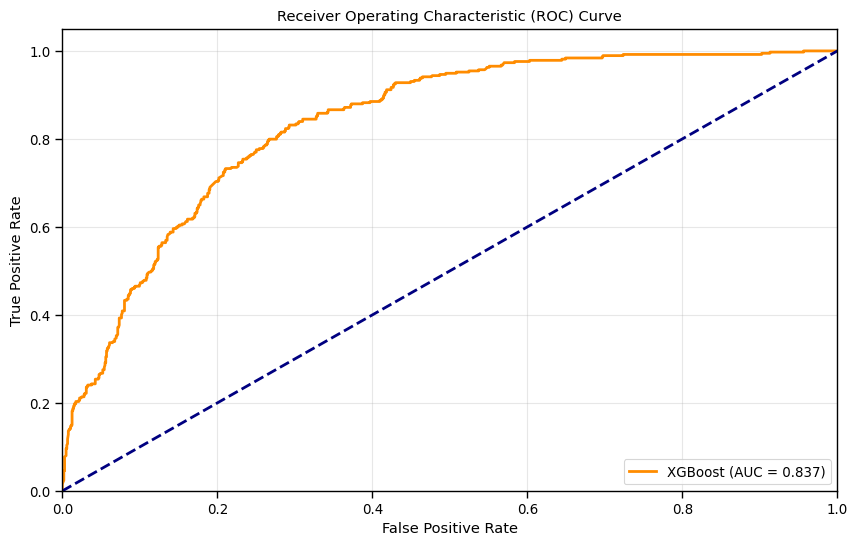

In [45]:
#=============================================================================
# MODEL EVALUATION
#=============================================================================
# Get predicted probabilities for the positive class (Churn=1)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"✅ Model AUC Score: {auc_score:.3f}")

# Get standard 0.5 threshold predictions
y_pred = pipeline.predict(X_test)
print("\n--- Classification Report (Default 0.5 Threshold) ---")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

--- Optimal Threshold Analysis ---
Target Recall: 80%
New Optimal Threshold: 0.962

--- Classification Report (Optimal Threshold) ---
              precision    recall  f1-score   support

    No Churn       0.74      1.00      0.85      1035
       Churn       1.00      0.00      0.01       374

    accuracy                           0.74      1409
   macro avg       0.87      0.50      0.43      1409
weighted avg       0.81      0.74      0.62      1409



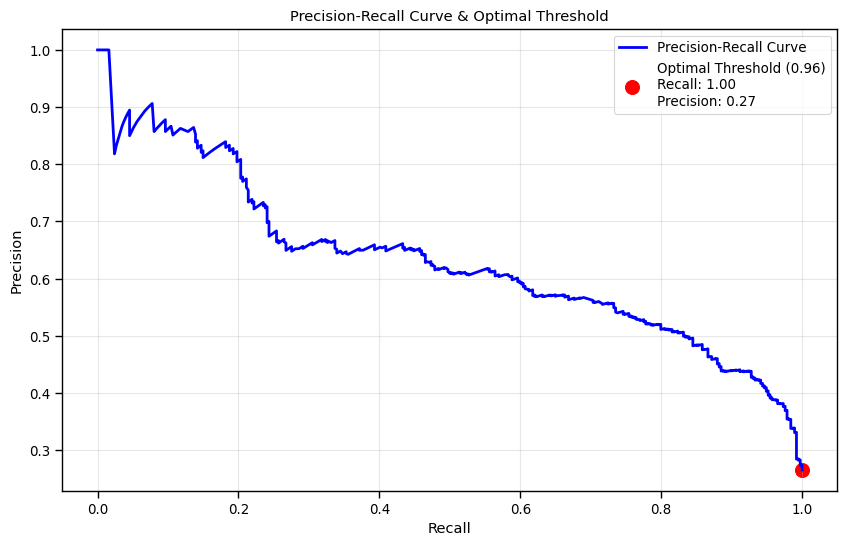

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold that gives us at least 80% recall
target_recall = 0.80
optimal_idx = np.searchsorted(recall, target_recall, side='left')
optimal_threshold = thresholds[optimal_idx - 1] # Move one index left to ensure recall is >= target

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print(f"--- Optimal Threshold Analysis ---")
print(f"Target Recall: {target_recall*100:.0f}%")
print(f"New Optimal Threshold: {optimal_threshold:.3f}")

print("\n--- Classification Report (Optimal Threshold) ---")
print(classification_report(y_test, y_pred_optimal, target_names=['No Churn', 'Churn']))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', s=100, 
            label=f'Optimal Threshold ({optimal_threshold:.2f})\nRecall: {recall[optimal_idx]:.2f}\nPrecision: {precision[optimal_idx]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve & Optimal Threshold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [48]:
# --- Business Assumptions ---
LTV = 1200
RETENTION_COST = 63
RETENTION_SUCCESS_RATE = 0.70 # We assume our $63 offer successfully retains 70% of churners

# --- Get Metrics from Optimal Threshold ---
cm = confusion_matrix(y_test, y_pred_optimal)
TN, FP, FN, TP = cm.ravel()

# --- Calculate Savings & Cost on Test Set (1407 customers) ---
total_offers_made = TP + FP
total_cost_to_retain = total_offers_made * RETENTION_COST

churners_retained = TP * RETENTION_SUCCESS_RATE
revenue_saved = churners_retained * LTV

net_savings = revenue_saved - total_cost_to_retain
roi = net_savings / total_cost_to_retain

# --- Scale to Annual Projection ---
# Test set is 20% of the total 7032 customers. We scale this up.
scaling_factor = len(df) / len(y_test)
projected_annual_savings = net_savings * scaling_factor

print("--- 💰 Business Impact (Test Set | 20% of data) ---")
print(f"Total Customers in Test Set: {len(y_test)}")
print(f"True Churners Identified (TP): {TP} (Recall: {TP/(TP+FN):.1%})")
print(f"Happy Customers Given Unneeded Offer (FP): {FP}")
print(f"Total Retention Offers Made: {total_offers_made}")
print("-" * 30)
print(f"Cost of Retention Offers: ${total_cost_to_retain:,.2f}")
print(f"Churners Successfully Retained: {churners_retained:.0f}")
print(f"Projected Revenue Saved: ${revenue_saved:,.2f}")
print("-" * 30)
print(f"Net Savings (Test Set): ${net_savings:,.2f}")
print(f"Return on Investment (ROI): {roi:.1f}x")

print("\n--- 🚀 Projected Annual Impact (Scaled to 7,032 Customers) ---")
print(f"Projected Annual Net Savings: ${projected_annual_savings:,.2f}")

--- 💰 Business Impact (Test Set | 20% of data) ---
Total Customers in Test Set: 1409
True Churners Identified (TP): 1 (Recall: 0.3%)
Happy Customers Given Unneeded Offer (FP): 0
Total Retention Offers Made: 1
------------------------------
Cost of Retention Offers: $63.00
Churners Successfully Retained: 1
Projected Revenue Saved: $840.00
------------------------------
Net Savings (Test Set): $777.00
Return on Investment (ROI): 12.3x

--- 🚀 Projected Annual Impact (Scaled to 7,032 Customers) ---
Projected Annual Net Savings: $3,883.90


Calculating SHAP values...
SHAP calculation complete.

--- Global Feature Importance --- 


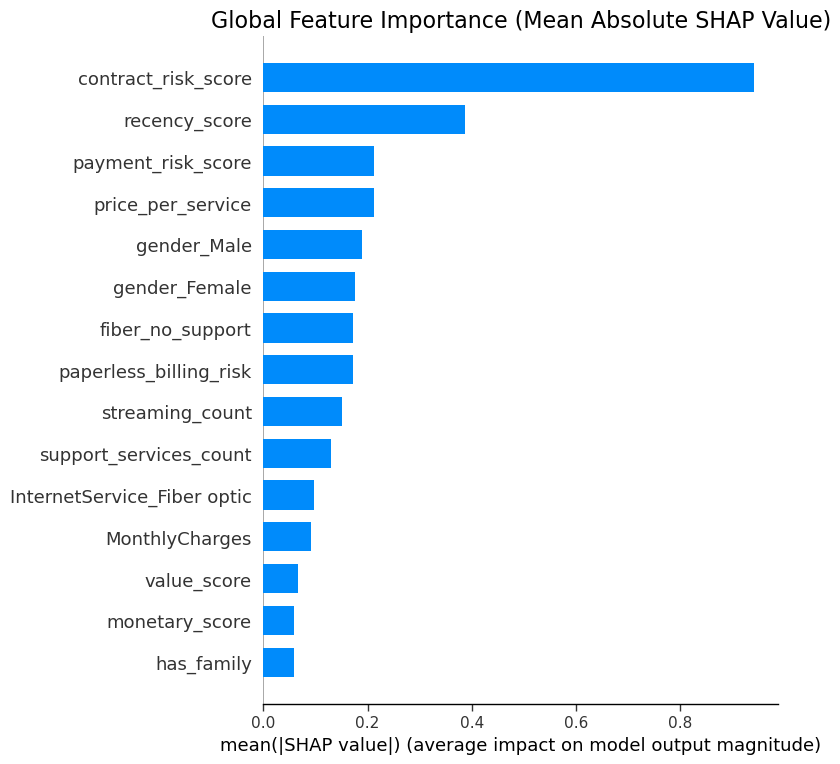


--- SHAP Summary Plot (Impact & Direction) --- 


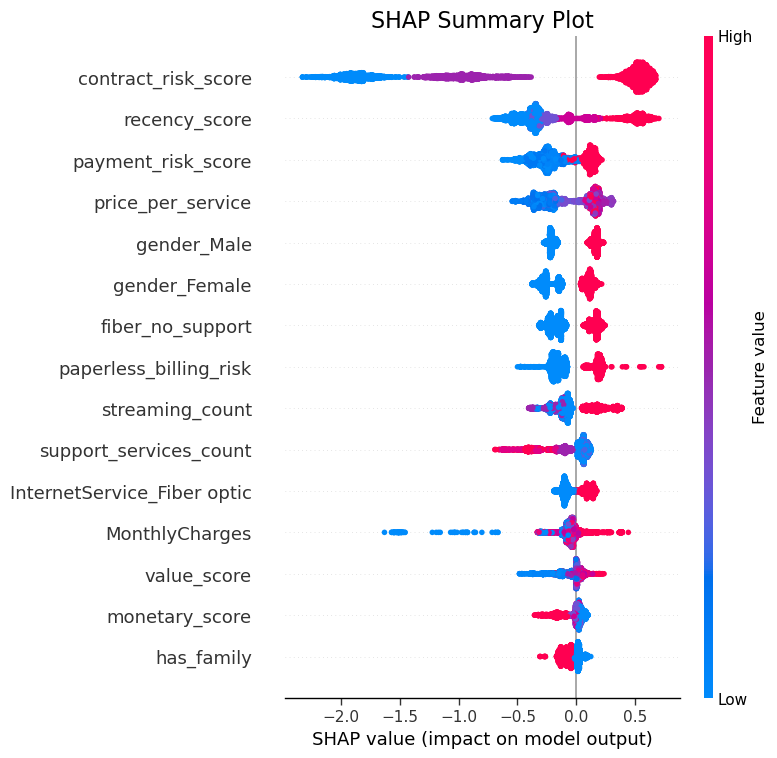

In [49]:
# SHAP requires a DataFrame with feature names. We need to process X_train first.
preprocessor_pipeline = pipeline.named_steps['preprocessor']
X_train_processed = preprocessor_pipeline.transform(X_train)

# Get the feature names from the OneHotEncoder
try:
    ohe_features = preprocessor_pipeline.named_transformers_['cat']\
                                      .named_steps['onehot']\
                                      .get_feature_names_out(categorical_features)
except AttributeError: # Fallback for older scikit-learn versions
    ohe_features = preprocessor_pipeline.named_transformers_['cat']\
                                      .named_steps['onehot']\
                                      .get_feature_names(categorical_features)

all_feature_names = numerical_features + list(ohe_features)

# Create DataFrame for SHAP
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

# Get the trained classifier from the pipeline
model = pipeline.named_steps['classifier']

# --- Calculate SHAP values ---
print("Calculating SHAP values...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_processed_df)
print("SHAP calculation complete.")

# --- Plot Global Feature Importance (Bar Plot) ---
print("\n--- Global Feature Importance --- ")
shap.summary_plot(shap_values, X_train_processed_df, plot_type="bar", 
                  max_display=15, show=False)
plt.title("Global Feature Importance (Mean Absolute SHAP Value)", fontsize=16)
plt.show()

# --- Plot SHAP Summary Plot (Beeswarm) ---
print("\n--- SHAP Summary Plot (Impact & Direction) --- ")
shap.summary_plot(shap_values, X_train_processed_df, max_display=15, show=False)
plt.title("SHAP Summary Plot", fontsize=16)
plt.show()